(chapter:functions)=
# Writing your own functions in R

This chapter is a quick guide to user-defined *functions* in R, with emphasis on the implementation of mathematical functions. Following this chapter you will be able to use R to write pieces of code which implement mathematical functions such as the ones studied in the module.  

:::{warning}
The concept of a **function** has distinct (although related) meanings in the contexts of mathematics and programming. 

In the lectures we have defined a mathematical function, $f$, as a rule which takes as an input a variable quantity, $x$ (the *argument* of the function), and for each value of $x$, returns **one and only one** value, $f(x)$, as output.

In programming, a function is a piece of computer program, which also takes some input, transforms it in a specified way, and produces some output. While intended as an implementation of the abstract mathematical concept of function, a function defined in a program may not be a mathematical function (for example, it may not necessarily map a value of the arguments to a unique value). However, we can write programming functions which implement mathematical functions and this is the context in which we will use programming functions in this course. 
:::

The best way to work through the chapter is to read the discussion and then reproduce all code in your own R/RStudio installation. You can do this by copying code from a notebook cell to your R script and run the code line by line.

The chapter includes some exercises that allow you to test your understanding. It is recommended that you try these exercises on your own before choosing the option to reveal the solutions.

## Defining a custom function

Suppose that you want to define a function 
- called `some_function` 
- which takes as arguments some values, `arg1`, `arg2`,..., `argN`
- makes some calculation based on the values of the arguments (as well as values stored in *variables* prior to the call of the function)
- and returns some output, `output`

The way to define this function in R is through the following code

:::{code-block}
some_function <- function(`arg1`, `arg2`,...,`argN`) {
  
  (optional) some code involving statements using {`arg1`, `arg2`, ..., `argN`} that define `output` 
  
  return(`output`)
}
:::

Once the function is defined, a call `some_function(ARG1, ARG2, ..., ARGN)` where `ARG1`, ..., `ARGN` are specific values of the arguments, will return the value of the output when these specific values are used as arguments. 

### Example

Suppose that we want to write an R function which implements the mathematical function 

$$
    f(x)=x^3-12x+3
$$

To do so we define an R function
- called `f`
- which takes as argument a value `x`
- and returns the value of the expression `x^3-12*x+3`


To do so type

In [1]:
f <- function(x) {
    return(x^3-12*x+3)
}

Once the function is defined we can evaluate the function at any specific value of the argument, say `4`, by typing `f(4)`.

In [2]:
f(4)

[1] 19

This makes sense because given $f(x)=x^3-12x+3$, it is true that $f(4)=19$. So the *programming* function `f` above, is an implementation of the mathematical function $f(x)=x^3-12x+3$.

Given this we can use our function to easily evaluate complex expressions involving the function. For example, given $f(x)=x^3-12x+3$ we can easily find the value of 

$$
    \frac{f(5)-f(3)}{f(4)}
$$ 

by simply typing

In [3]:
(f(5)-f(3))/f(4)

[1] 3.894737

Note that we could have defined a function implementing $f(x)=x^3-12x+3$ in more complicated ways as well, as long as we correctly follow the syntax rules. For example, the function `f1` below uses a different code but results in the same rule.

In [4]:
f1 <- function(x) {
    y <- x^3-12*x+3
    return(y)
}

In [5]:
(f1(5)-f1(3))/f1(4)

[1] 3.894737

An even more complicated implementation of the same mathematical function is the function `f2` below

In [6]:
f2 <- function(x) {
    term1 <- x*x*x
    term2 <- -12*x
    term3 <- 3
    out = term1 + term2 + term3
    return(out)
}

In [7]:
(f2(5)-f2(3))/f2(4)

[1] 3.894737

:::{note}
The purpose of this discussion is not to suggest using more complicated code for defining simple functions but simply to show how user-defined functions in R work. 
:::

:::{exercise}
:label: ex-function

Write an R function called `g` which implements the mathematical function 

$$
    g(x)=3x^2-2x+1
$$

Then evaluate the expression 

$$
    \frac{g(2)-g(3)}{g(1)}
$$

:::

::::{solution} ex-function
:class: dropdown

One code that implements the function is the following

:::{code-block}

g <- function(x) {
return(3*x^2-2*x+1)
}                         # Define the function


(g(2)-g(3))/g(1)          # Evaluate the expression

:::
    
::::    

### A note on functions of several variables. 

While we have not yet studied multivariate functions in the module (coming soon) we can easily implement a mathematical function of several variables in R by using the exact same syntax rules. For example, a simple function of three variables is the function $h(x,y,z)=x+y-z$ - a rule which takes the values of three arguments ($x$, $y$ and $z$) and returns a number equal to $x+y-z$. For example,  

In [8]:
h <- function(x,y,z) {
    return(x+y-z)
} 

Then we can evaluate $h(x=1,y=2,z=3)=1+2-3=0$ simply by typing

In [9]:
h(1,2,3)

[1] 0

## (Optional) A note on global and local variables

In the context of programming there is an important distinction between two types of variables - **global variables** and **local variables**. 

:::{note}
The distinction between local and global variables is a relatively advanced idea and not directly relevant to the context of these notes as supplementing a mathematics course. For this reason, don't worry if at this stage you have difficulties in understanding the discussion. 

However, the distinction is fundamental to programming and occurs in every programming language. Since you are likely to use R for the duration of your degree, understanding the programming concepts of local and global variables can be very helpful later on.   
:::

### Global variables

Informally, within a program (think within the execution of an R script), a global variable is one that, once defined, can be called from any part of the program. If you use RStudio, you can see a list of all global variables defined within the code that you have executed in the Environment window. Whenever you define a variable within your program outside of a function, you have defined a global variable which can then be used as a named store of value in any subsequent part of the code, including functions.

For example, if you run the following code within the main body of your RStudio script (or from the R console)

In [10]:
newvar <- 5 # defines a new global variable

you define a new global variable, called `newvar` with value 5. You will notice that the variable `newvar` with value `5` appears in the Environment window of your RStudio.

Since the variable is global it can then be called in any subsequent part of the code. For example, if you later type 

In [11]:
newvar

[1] 5

the output is the value of the variable, 5. Similarly if you define a new variable `newvar2` based on `newvar`

In [12]:
newvar2 <- newvar + 1
newvar2

[1] 6

you would have created a new variable `newvar2` whose value will equal the value of `newvar` + 1.

Similarly if you use a global variable inside a function (e.g. the function `newfun` below which takes a number and returns the sum of this number and `newvar`) 

In [13]:
newfun <- function(x) {
 return(x+newvar)
}

and call the function with argument `2`, the output will be

In [14]:
newfun(2)

[1] 7

equal to 2 + 5.

### Local variables

On the other hand, local variables are ones that exist temporarily in the memory of your computer, only for the duration of the execution of a part of the code. When a new variable is defined within a function it can be called from further code within the same function, but after the execution of the function will no longer exist in the computer memory. 

For example, consider the function `f2` defined above (reproduced below for clarity).

In [15]:
f2 <- function(x) {
    term1 <- x*x*x
    term2 <- -12*x
    term3 <- 3
    out = term1 + term2 + term3
    return(out)
}

Within the body of the function, we define four new variables: `term1`, `term2`, `term3`, and `out`. All of these variables are important for the running of the function as its output (the expression inside `return()`) depends on them. However, these variables are local to the function - they only exist temporarily in your computer memory during the execution of the function. 

For example, if following the definition and execution of the function, we type

:::{code-block}
term1
:::

:::{code-block}
object 'term1' not found
:::

we get an error message telling us that the "object" `term1` does not exist. Indeed, it does not - it only exists briefly during the execution of the function. You can also verify that a variable `term1` does not exist in your environment (no such variable appears in your RStudio Environment window). 

In programming local variables are useful because they make your code use computer memory less intensely, and this could have a significant impact on speed and performance with more complicated pieces of code. At this stage, however, we are not focusing on writing efficient code so most of the above discussion is only intended as an important side note.

## Using R functions inside `plot()`

As already discussed in {ref}`chapter:plotting` the standard way of plotting the graph of a function of R is by specifying vectors of $x$ and $y$ coordinates and then calling `plot(x,y,type="l")`.

For example, the graph of $f(x)=x^3-12x+3$ above for $x\in[-3,3]$ can be plotted by using the following code:

In [16]:
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=240)
options(jupyter.plot_mimetypes = "image/png") 

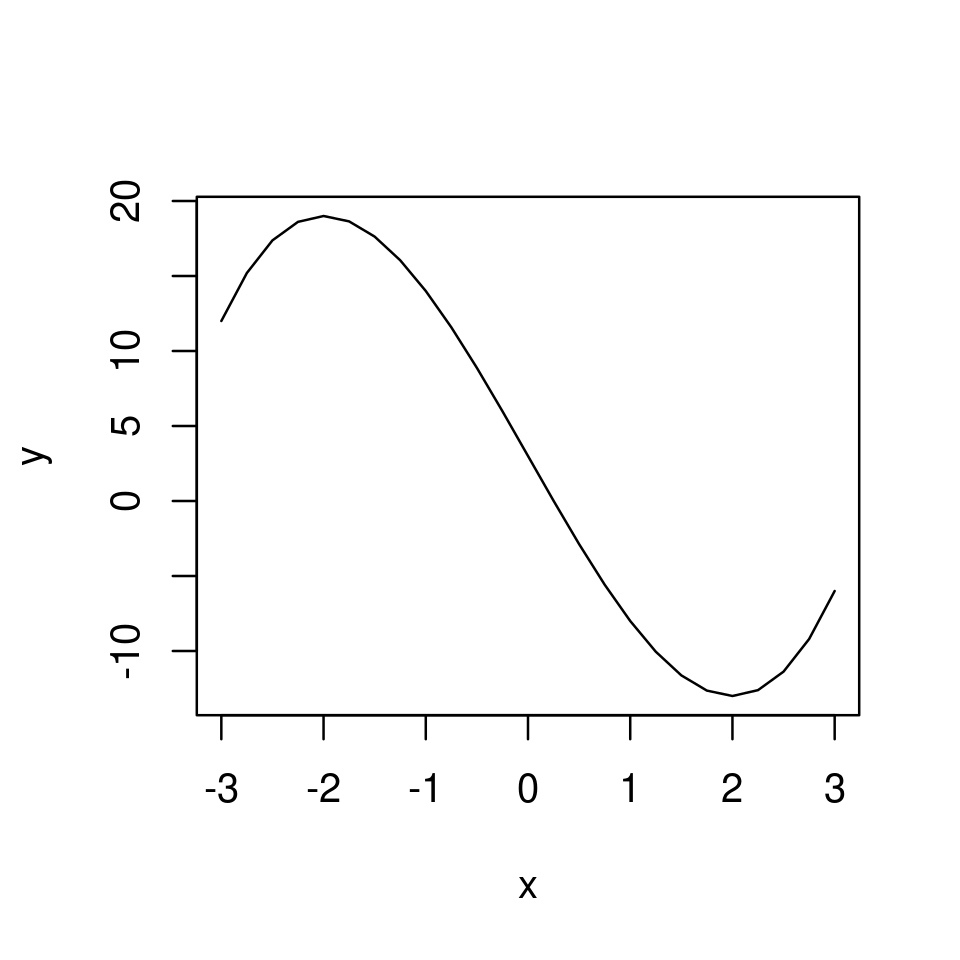

In [17]:
x <- seq(-3,3,0.25)
y <- x^3-12*x+3

plot(x,y,type="l")

Once we have defined a function `f` which implements $f(x)$ above, one think we can do is use the function `f` to construct the correct $y$ coordinates after constructing the $x$ coordinates. In R when a function of one variable is called with a vector, the associated output is a vector of the same length with each element obtained as the value of the function evaluated at the corresponding element of the first vector. Therefore, the following code produces an identical plot to the above.

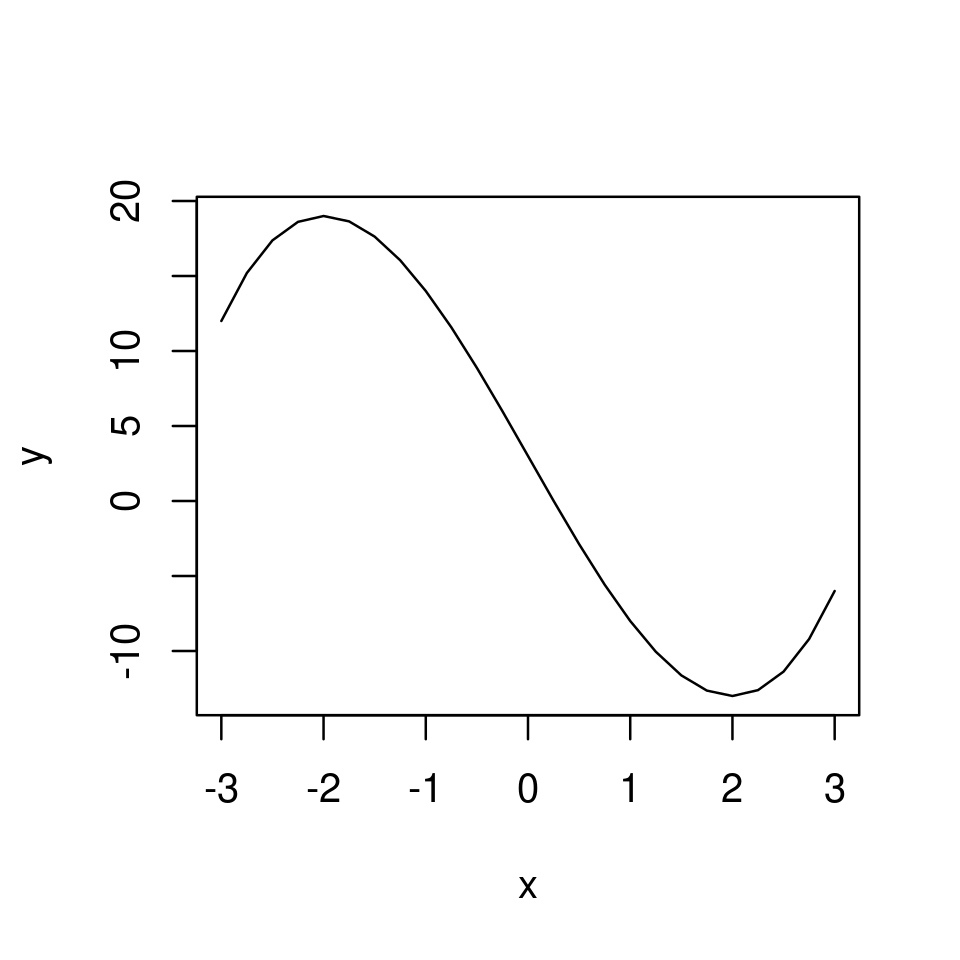

In [18]:
x <- seq(-3,3,0.25)
y <- f(x)

plot(x,y,type="l")

However, even more conveniently, the function `plot()` can be called directly with a user defined function without specifying a vector of $x$-coordinates, but only setting the domain for the plot (by using the `from` and `to` optional arguments). For example, once we have defined the **function** `f`, the graph of the function over $x\in[-3,3]$ can be constructed with the following simplified code:

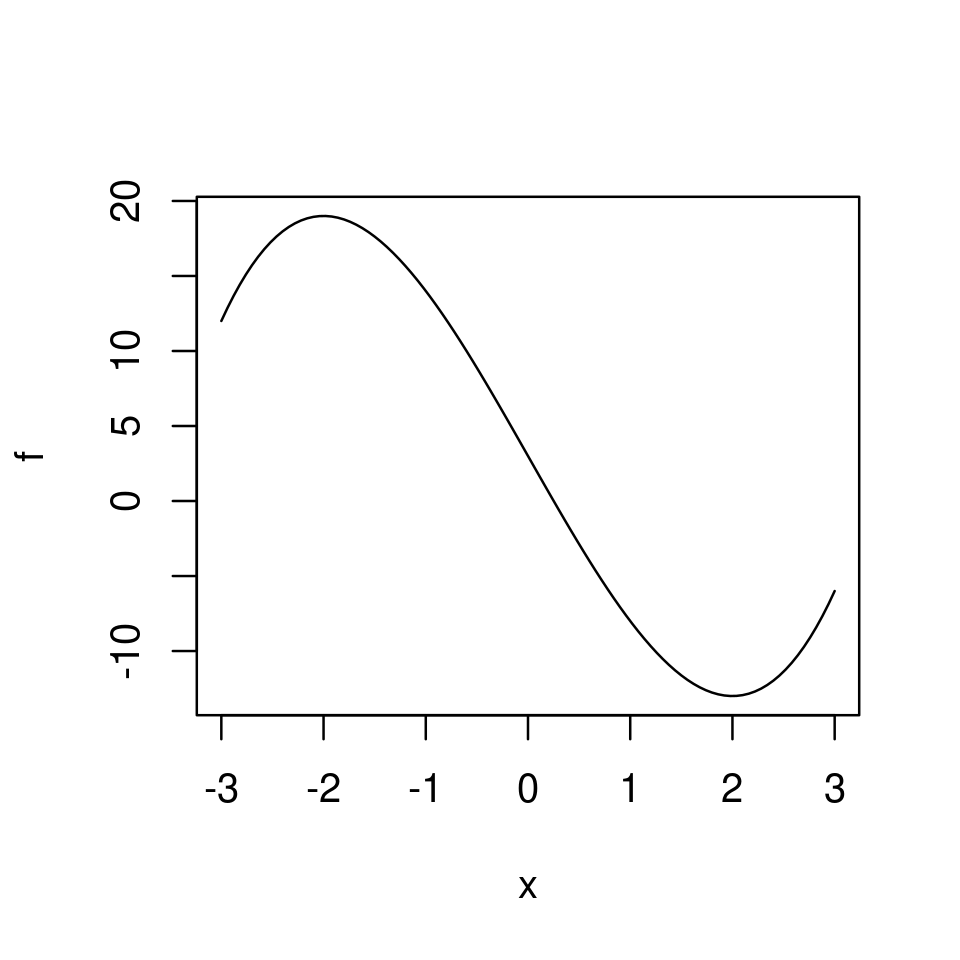

In [19]:
plot(f, from=-3, to=3)

The graph can be further customized in the same way as discussed in {ref}`content:plots:customization`.

For example,

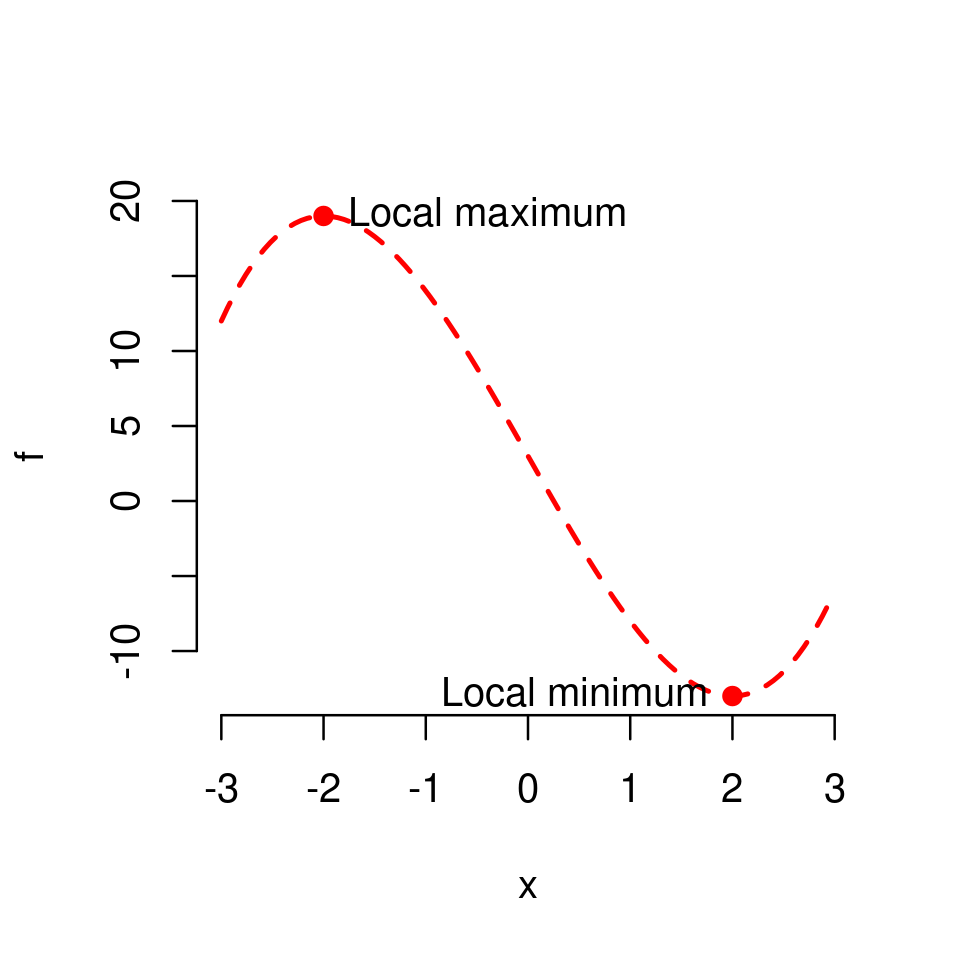

In [20]:
plot(f, from=-3, to=3,
    lty=2,
    lwd=2,
    col="red",
    frame=FALSE)

points(c(-2,2), f(c(-2,2)), pch=19, col="red")

text(2, f(2), "Local minimum", pos=2)
text(-2, f(-2), "Local maximum", pos=4)

This completes the discussion of {ref}`chapter:functions`. We next turn attention to applications of loops to evaluating geometric series.